Notebook to look at how resource costs evolve with reco time

Doing Reduction in MC/data ratio
1.00 0.00
0.95 0.02
0.90 0.05
0.85 0.07
0.80 0.10
0.75 0.12
0.70 0.15
0.65 0.17
0.60 0.20
0.55 0.22
0.50 0.25
0.45 0.27
0.40 0.30
0.35 0.32
0.30 0.35
0.25 0.37
0.20 0.40
0.15 0.42
0.10 0.44
0.05 0.47
Doing Reduction in MC RECO events (fraction)
1.00 0.00
0.95 0.01
0.90 0.03
0.85 0.04
0.80 0.05
0.75 0.06
0.70 0.08
0.65 0.09
0.60 0.10
0.55 0.12
0.50 0.13
0.45 0.14
0.40 0.15
0.35 0.17
0.30 0.18
0.25 0.19
0.20 0.21
0.15 0.22
0.10 0.23
0.05 0.24
Doing Reduction in trigger rate
1.00 0.00
0.95 0.05
0.90 0.10
0.85 0.15
0.80 0.20
0.75 0.25
0.70 0.29
0.65 0.34
0.60 0.39
0.55 0.44
0.50 0.49
0.45 0.54
0.40 0.59
0.35 0.64
0.30 0.69
0.25 0.74
0.20 0.79
0.15 0.83
0.10 0.88
0.05 0.91
Doing Reduction in Reconstruction time (fraction)
1.00 0.00
0.95 0.03
0.90 0.06
0.85 0.09
0.80 0.12
0.75 0.14
0.70 0.17
0.65 0.20
0.60 0.23
0.55 0.26
0.50 0.29
0.45 0.32
0.40 0.35
0.35 0.37
0.30 0.40
0.25 0.43
0.20 0.46
0.15 0.49
0.10 0.52
0.05 0.55


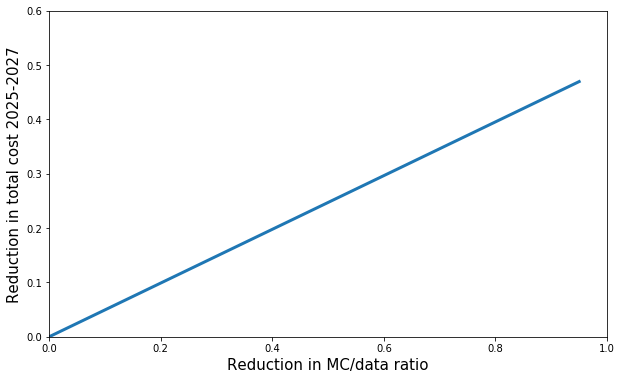

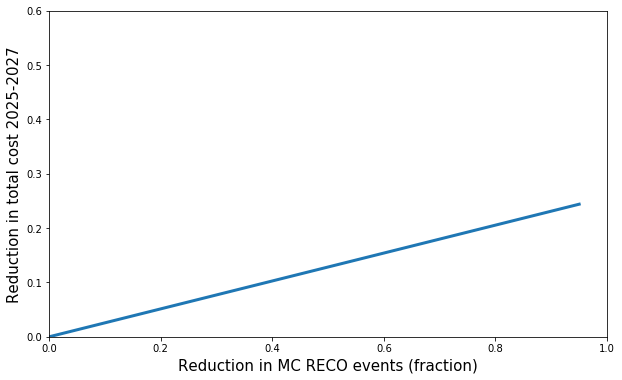

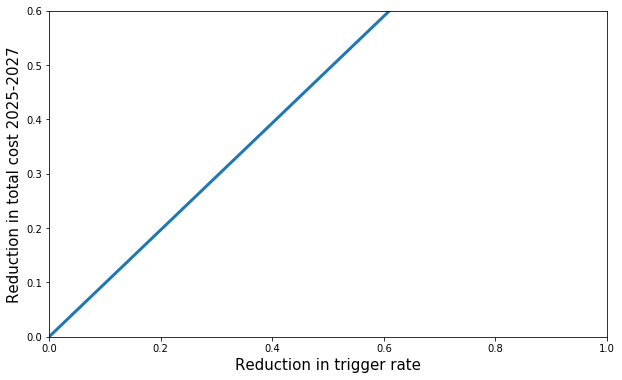

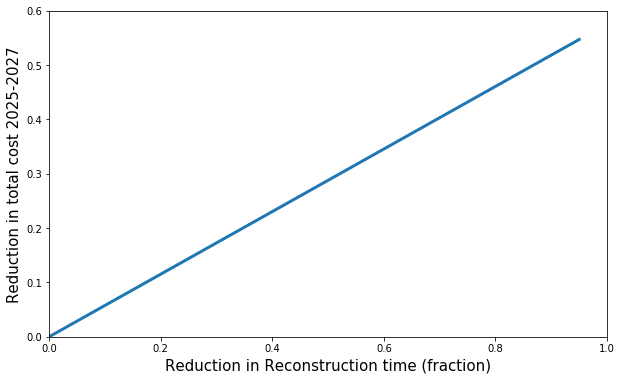

In [9]:
%run notebook_importer.ipynb
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 6

from resource_runner import run_computing_model
import resource_cpu
import CostEvolution

jsons=['json/RelyOnMiniAOD.json', 'json/Analysis.json', 'json/2018changes.json', 'json/2018FallChanges.json', 'json/IntroduceNanoAOD.json'] 
model=resource_cpu.create_model(jsons )
model['names']=jsons
cost_models=CostEvolution.define_cost_model()
model['cost_model']=cost_models

#print default_reco_hs06,default_reco_hs06_mc
import numpy

def get_params(model,params):
    retVal=[]
    for p in params:
        t=model
        for a in p:
            t=t.get(a)
        retVal.append(t)
    return retVal

def set_params(model,params,defaults,v):
    for i,p in enumerate(params):
        t=model
        if len(p)>1:
            for a in p[:-1]:
                t=t.get(a)
        t[p[-1]]=v*defaults[i]


parameterChanges={}
parameterChanges["Reduction in Reconstruction time (fraction)"]= [ ['cpu_time','data','RECO',"2026"], ['cpu_time','mc','RECO','2026']]
parameterChanges["Reduction in MC RECO events (fraction)"]= [['cpu_time','mc','RECO','2026']]
parameterChanges["Reduction in trigger rate"]=[ ['trigger_rate','2026']]
parameterChanges["Reduction in MC/data ratio"]=[ ['mc_evolution','2026','2026']]

#default_reco_hs06 = model['cpu_time']['data']['RECO']["2026"]
#default_reco_hs06_mc = model['cpu_time']['mc']['RECO']["2026"]
figNum=0
for p in parameterChanges:
    figNum+=1
    print 'Doing',p
    params=parameterChanges[p]
    defaults=get_params(model,params)
    
    vals = numpy.arange(1.0,0.0,-0.05)
    costs=numpy.zeros(vals.shape[0])
    for i,v in enumerate(vals):
        set_params(model,params,defaults,v) 
        #model['cpu_time']['data']['RECO']["2026"] = default_reco_hs06 * v
        #model['cpu_time']['mc']['RECO']["2026"] = default_reco_hs06_mc * v
        metrics,details=run_computing_model(model)
        costs[i]=metrics['cost']
        #print i, v, metrics
    set_params(model,params,defaults,1.0)
    
    costFractions=1.0-costs/costs[0]
    for i in range(len(vals)):
        print '%4.2f %4.2f' %(vals[i],costFractions[i])
    
    import pylab
    pylab.figure(10+figNum)
    pylab.plot(1-vals,costFractions,linewidth=3)
    pylab.xlabel(p,fontsize=15)
    pylab.ylabel('Reduction in total cost 2025-2027',fontsize=15)
    pylab.ylim(ymin=0., ymax=0.6)
    pylab.xlim(xmin=0., xmax=1.0)

#pylab.figure(11)
#pylab.plot(vals,costs,linewidth=3)
#pylab.xlabel('RECO time reduction factor',fontsize=15)
#pylab.ylabel('Estimated Compute 2025-2027 ($M)',fontsize=15)
#pylab.ylim(ymin=0., ymax=150.)



    